<a href="https://colab.research.google.com/github/nowshaba/yolo/blob/main/yolo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import cv2
import numpy as np 

In [ ]:
net = cv2.dnn.readNet("/content/drive/MyDrive/Datasets/Yolo/yolov3.weights", "/content/drive/MyDrive/Datasets/Yolo/yolov3.cfg")
classes = []
with open("/content/drive/MyDrive/Datasets/Yolo/coco.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]
layer_names = net.getLayerNames()
output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]
colors = np.random.uniform(0, 255, size=(len(classes), 3))

In [ ]:
# Loading image
img = cv2.imread("/content/drive/MyDrive/Datasets/Yolo/traffic.jpeg")
img = cv2.resize(img, None, fx=0.9, fy=0.9)
height, width, channels = img.shape

In [ ]:
# Detecting objects
blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
net.setInput(blob)
outs = net.forward(output_layers)
#print(blob.shape)

In [ ]:

class_ids = []
confidences = []
boxes = []
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5:
            # Object detected
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)
            # Rectangle coordinates
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)
            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

In [ ]:
#non max suppresion
indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

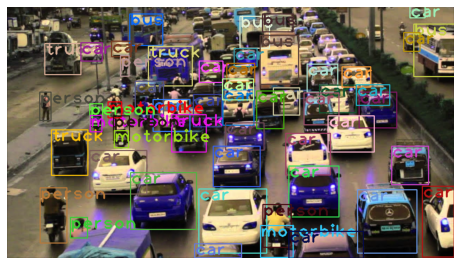

In [ ]:
font = cv2.FONT_HERSHEY_PLAIN
for i in range(len(boxes)):
    if i in indexes:
        x, y, w, h = boxes[i]
        label = str(classes[class_ids[i]])
        color = colors[i]
        cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
        cv2.putText(img, label, (x, y + 30), font, 3, color, 3)


import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
plt.imshow(img)
plt.axis('off')
plt.show()